In [1]:
import pandas as pd
import numpy as np
import smooth

# Сглаживание

## Получение данных

In [2]:
fileIn = "Data/1_SiO2_Al2O3.dat" # Входной файл
fileOut = "Data/s_1_SiO2_Al2O3.dat" # Выходной файл

Считываем данные из файла fileIn.

In [3]:
unified = pd.read_csv(fileIn, index_col=0, dtype=np.double)
unified.head()

,SiO2,Au/SiO2,Al2O3,Au/Al2O3
Time,,,,
0.000000,21.962,21.929,21.810,21.856
0.009744,21.865,21.939,21.853,21.877
0.019488,21.875,21.918,21.757,21.845
0.029232,21.865,21.886,21.853,21.867
0.038976,21.833,21.929,21.831,21.877


## Построение графика

Выведем весь график.

In [4]:
unified.plot();

Увеличим масштабы для контроля сглаживания.

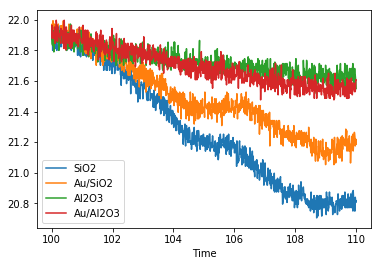

In [5]:
unified[100:110].plot();

## Сглаживание

Для сглаживания используем фильтр Баттерворта.

Доп. информация:  
    [SciPy - scipy.signal.butter](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.butter.html)  
    [Википедия - Фильтр Баттерворта](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D1%8C%D1%82%D1%80_%D0%91%D0%B0%D1%82%D1%82%D0%B5%D1%80%D0%B2%D0%BE%D1%80%D1%82%D0%B0)

Установим параметры для сглаживания.

N - порядок фильтра. От него зависит точность. В нашем случае, достаточно третьего порядка точности.
Wn - критические частоты. В нашем случае (дискретный сигнал) - это величина нормированная и изменяется от 0 до 1. Wn = 1 - частота Найквиста (половина частоты дискретизации сигнала).

Для температурной характеристики, виберем Wn = 1e-3, т.к хотим получить максимально "гладкий" сигнал.

In [6]:
N = 3
Wn = 1e-3

smoothed = pd.DataFrame(index=unified.index)
for key in unified.keys():
    smoothed[key] = smooth.smooth(unified[key], N, Wn)[0]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


## Просмотр результата

Выведем полученные графики.

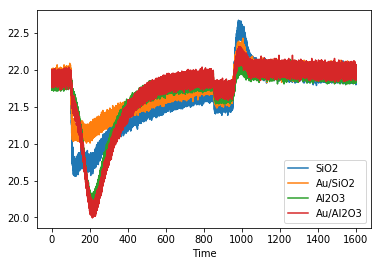

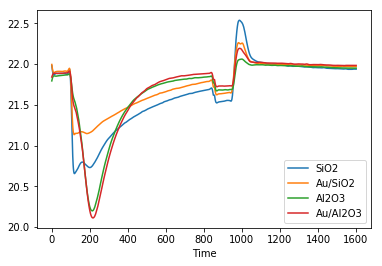

In [7]:
unified.plot();
smoothed.plot();

Сравним графики на маленьком масштабе.

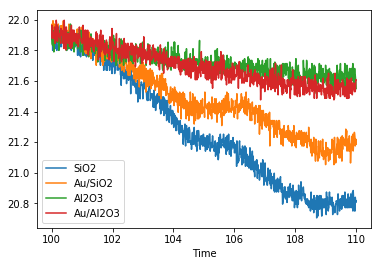

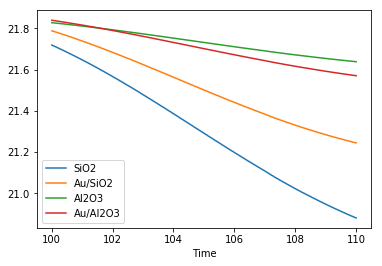

In [8]:
unified[100:110].plot();
smoothed[100:110].plot();

## Экспорт данных

Экспортируем полученную таблицу в файл fileOut.

In [9]:
smoothed.to_csv(fileOut)